# Importing Packages
- Below you will see the following packages I will be using for my report on Baltimore City Crime.
- I will be using csv, pandas, matplotlib, and seaborn. 

In [1]:
import csv
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

# Taking in the Data
- The code you see below is me reading in two csv files containing criminal activity from by 2011-2016 and 1965-2020 within Baltimore City.
- You then will see me reading in certain columns of data form the csvs. I am doing this because between the two files only what is listed in the code below is shared amoung the two files.
- I then created a variable called "CrimeReport" this variable will be used to house the two csv file's data after is has been merged. 
- Once I mergered the two files into one I then drop any duplicates from the CrimeReport dataframe so that I can have a more accurate data set to work from. 
- Finally, I export the CrimeReport dataframe into it's own csv to save on memory. 

In [2]:
Report_2011_2016 = pd.read_csv("BPD_Crime_2011-2016.csv", usecols = ['CrimeDate','CrimeTime','CrimeCode','Description','Inside/Outside','Weapon','District','Neighborhood','Total Incidents'])
Report_2014_2020 = pd.read_csv("BPD_Part_1_Victim_Based_Crime_Data.csv",usecols = ['CrimeDate','CrimeTime','CrimeCode','Description','Inside/Outside','Weapon','District','Neighborhood','Total Incidents'])
CrimeReport = pd.DataFrame()
CrimeReport = pd.concat([Report_2011_2016,Report_2014_2020])
CrimeReport = CrimeReport.drop_duplicates(['CrimeDate','CrimeTime','CrimeCode','Description','Inside/Outside','Weapon','District','Neighborhood','Total Incidents'])
CrimeReport.to_csv("Baltimore City Crime Report 2011-2020.csv", index=False)

# Cleaning Data Part 1
 - First line you will see me reading in the new csv file using the variable CrimeReport. 
 - The next six lines you will see me cleaning and adding columns in the data set, I changed all "NaN" values to unknown or not reported to see from a reporting standpoint how much data is missed. 
 - Last two lines me filtering out any row of data that does not contain the year 2011 or greater. This is done due to the years before 2011 only containing partial entries. I did not want this to mess up the metric portion of my charts down the line in the project.  

In [44]:
CrimeReport = pd.read_csv("Baltimore City Crime Report 2011-2020.csv")
CrimeReport['Month'] = CrimeReport['CrimeDate'].str[0:2]
CrimeReport['Year'] = CrimeReport['CrimeDate'].str[6:].astype('int64')
CrimeReport['District'] = CrimeReport['District'].fillna('Unknown')
CrimeReport['Weapon'] = CrimeReport['Weapon'].fillna('Unknown')
CrimeReport['Inside/Outside'] = CrimeReport['Inside/Outside'].fillna('Unknown')
CrimeReport['Neighborhood'] = CrimeReport['Neighborhood'].fillna('No Neighborhood')
Index=CrimeReport[CrimeReport['Year'] < 2011 ].index
CrimeReport.drop(Index,inplace=True)
CrimeReport.to_csv("Baltimore City Crime Report 2011-2020.csv", index=False)

# Cleaning Data Part 2
- You will see the two lines below that I am sorting the data in the frame to ascend with the latest year and time a crime was committed. 

In [4]:
CrimeReport = CrimeReport.sort_values(by=['Year','CrimeDate'],ascending=False)
CrimeReport = CrimeReport.reset_index(drop=True)

# Cleaning Data Part 3
- The following block of code you will see that I am replacing alot of data values with in certain columns. The reason for this is that certain columns such as the 'District' would have the same district but miss spelled. So I went in and replace all data strings to match a uniformed string so that mertics later on are not mis leading or incorrect. 

In [5]:
replacements=[("I", "Inside"),("O", "Outside"),('UNKNOWN','unknown'),('Unknown','unknown'),('Central','CENTRAL'),
              ('NORTHEAST','NORTHEASTERN'),('NORTHESTERN','NORTHEASTERN'),('NORTHWEST','NORTHWESTERN'),
              ('BELAIR-EDISON','Belair-Edison'),('BROOKLYN','Brooklyn'),('CANTON','Canton'),('CHERRY HILL','Cherry Hill'),
              ('COLDSTREAM HOMESTEAD','Coldstream Homestead Montebello'),('DOWNTOWN','Downtown'),('FELLS POINT','Fells Point'),
              ('FRANKFORD','Frankford'),('INNER HARBOR','Inner Harbor'),('SANDTOWN-WINCHESTER','Sandtown-Winchester'),('UPTON','Upton'),
              ('WASHINGTON VILLAGE','Washington Village/Pigtown'),('BROADWAY EAST','Broadway East'),('CARROLLTON RIDGE','Carrollton Ridge'),
              ('CENTRAL PARK HEIGHTS','Central Park Heights'),('CHARLES VILLAGE','Charles Village'),('EAST BALTIMORE MIDWA','East Baltimore Midway'),
              ('ELLWOOD PARK/MONUMEN','Ellwood Park/Monument'),('HAMPDEN','Hampden'),('MONDAWMIN','Mondawmin'),('MOUNT VERNON','Mount Vernon'),
              ('MID-TOWN BELVEDERE','Mid-Town Belvedere'),('MCELDERRY PARK','McElderry Park'),('OLIVER','Oliver'),('RESERVOIR HILL','Reservoir Hill'),
              ('01','Jan'),('02','Feb'),('03','Mar'),('04','Apr'),('05','May'),('06','Jun'),('07','Jul'),('08','Aug'),('09','Sep'),('10','Oct'),('11','Nov'),('12','Dec'),
              ('SOUTHEAST','SOUTHEASTERN'),('SOUTHESTERN','SOUTHEASTERN'),('SOUTHWEST','SOUTHWESTERN'),('Gay Street','CENTRAL'),("FIRE", "FIREARM")]
for each_replacement in replacements:
    assert len(each_replacement) == 2 and isinstance(each_replacement, tuple)
    CrimeReport.replace(each_replacement[0], each_replacement[1], inplace=True)

# TOP-LEVEL VIEW OF THE CRIME IN BALTIMORE CITY FROM DIFFERENT FILTERS

# Criminal Activity Reported by Districts from 2011-2020
- You will see from the bar graph below that the Northeastern district out of all 9 Baltimore City districts is the most dangerous with a report of over 80,000+ reports from 2011-2020.
- You will also find that the Southeastern district comes to be a close second will almost 75,000+ reports.
- Now at the very bottom you will see a unknown mark. This is the marker with the amount of criminal reports that were not reported with a district. Some questions here could be made as to why is this so and how can we make sure that we each report is place at the correct location. 

"bars=alt.Chart(CrimeReport).mark_bar().encode(\n    x='sum(Total Incidents)',\n    y=alt.Y('District',sort='-x')\n)\ntext=bars.mark_text(\n    align='left',\n    baseline='middle',\n    dx=3  \n).encode(\n    text='count()'\n)\n(bars+text).properties(height=500)"

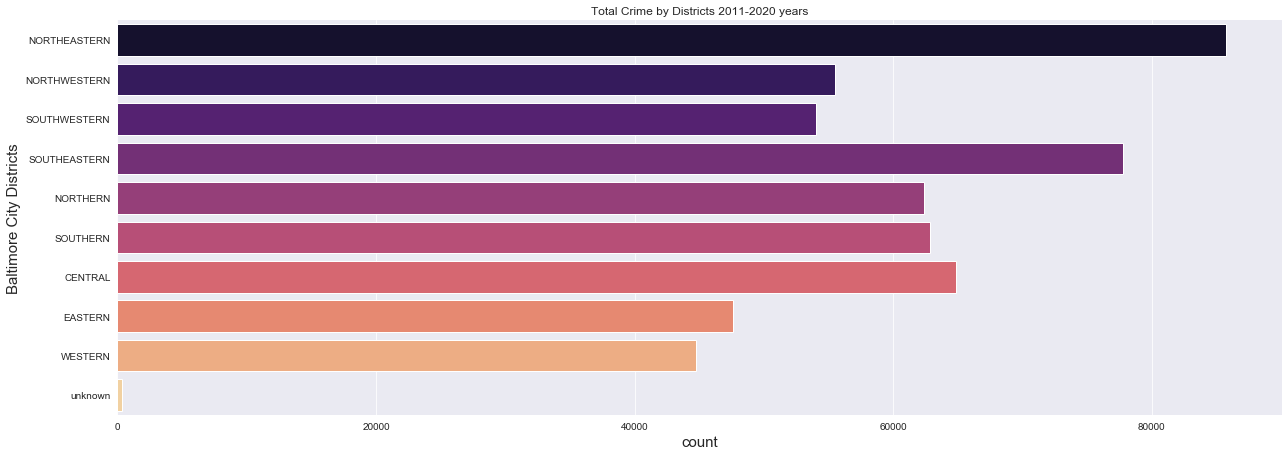

In [42]:
sns.set_context(font_scale=1,rc={"font.size":10,"axes.labelsize":15})
sns.set_style("darkgrid")
sns.catplot(y="District", data=CrimeReport, height=6,aspect=3.0, kind='count',palette='magma').set_ylabels('Baltimore City Districts').set(title='Total Crime by Districts 2011-2020 years')
'''bars=alt.Chart(CrimeReport).mark_bar().encode(
    x='sum(Total Incidents)',
    y=alt.Y('District',sort='-x')
)
text=bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  
).encode(
    text='count()'
)
(bars+text).properties(height=500)'''

# Criminal Activity from the Nine of the most activie Neighborhoods in Baltimore City.
- We can see that from the report Downtown is the holder for most reported cases with 17,500+ reports

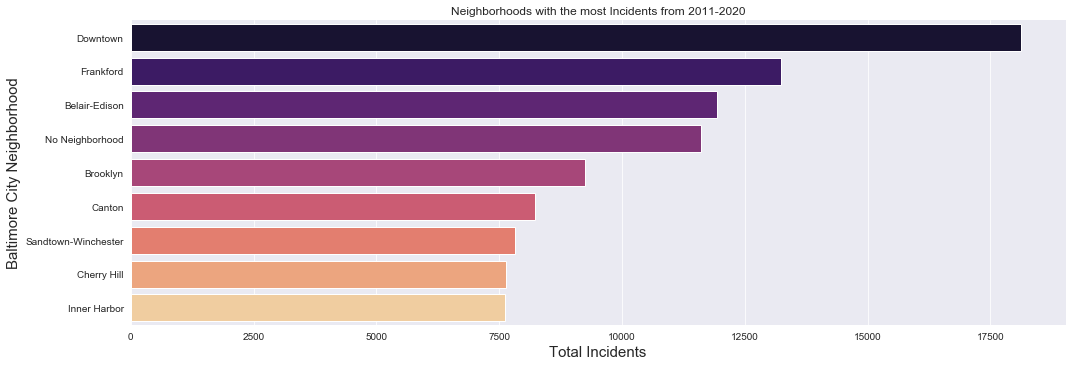

In [41]:
Neighborhood = CrimeReport[['Neighborhood','Total Incidents']].groupby('Neighborhood').count().reset_index() 
Neighborhood = Neighborhood[Neighborhood['Total Incidents']>7000]
Neighborhood.sort_values('Total Incidents', ascending=False,inplace=True)
sns.set_context(font_scale=1,rc={"font.size":10,"axes.labelsize":15})
sns.set_style("darkgrid")
sns.catplot(y="Neighborhood",x='Total Incidents',data=Neighborhood,kind='bar',height=5,aspect=3,palette='magma').set(title='Neighborhoods with the most Incidents from 2011-2020',ylabel='Baltimore City Neighborhood',xlabel='Total Incidents')

# Weapons reported being used in criminal offenses from 2011-2020
- As you can see between the Knife, Other, Firearm, and hands. No total reached over 50,000 from 2011-2020.
- Interesting fined is that there were more crimes committed where the weapon used was someone's hands
- On the other hand you will see that there were over 400,000 reports that did not list whether or not a weapon was used in the criminal act. 

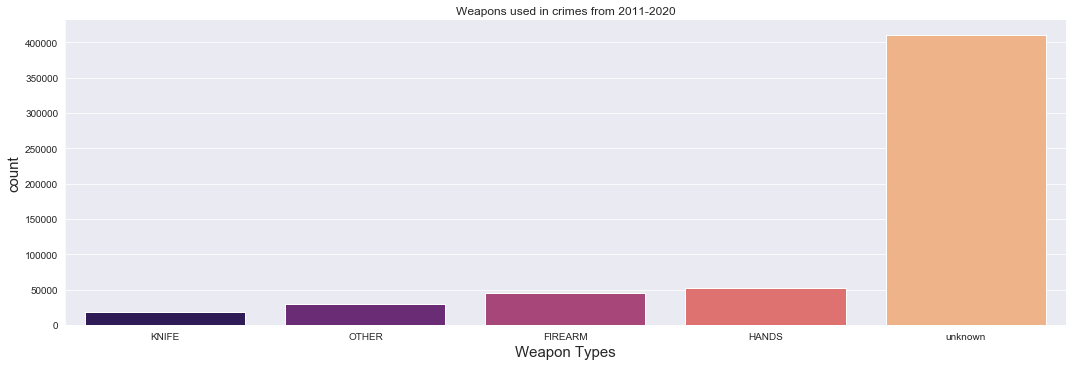

In [40]:
Weapon = CrimeReport['Weapon'].value_counts().reset_index()
Weapon.rename(columns={"index":"Weapon","Weapon":"Count"},inplace=True)
Weapon.sort_values('Count',inplace=True)
sns.set_context(font_scale=1,rc={"font.size":10,"axes.labelsize":15})
sns.set_style("darkgrid")
sns.catplot(x="Weapon",y="Count", data=Weapon, kind='bar',height=5,aspect=3,palette='magma').set(title='Weapons used in crimes from 2011-2020',xlabel='Weapon Types',ylabel='count')

# The Report of Criminal Charges given from 2011-2020
- As you will see from the report is that from a almost 9 year span the most common charge in Baltimore City is Larceny (Theift of personal property)
- The shocking find for me is seeing that Homicide is the second to last common charge given in Baltimore city. 

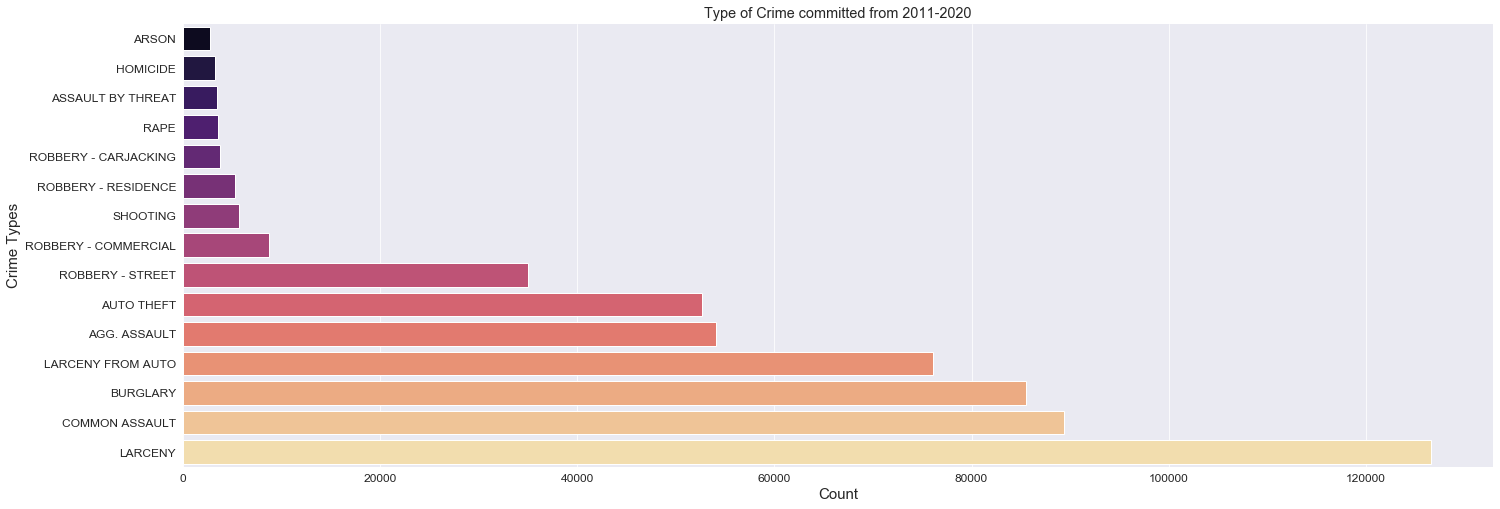

In [39]:
TypeOfCrime = CrimeReport[['Description','Total Incidents']].groupby("Description").count().reset_index().sort_values('Total Incidents')
sns.set_context(font_scale=1,rc={"font.size":12,"axes.labelsize":15})
sns.set_style("darkgrid")
sns.catplot(y="Description",x="Total Incidents", data=TypeOfCrime, kind='bar',height=7,aspect=3,palette='magma').set(title='Type of Crime committed from 2011-2020',ylabel='Crime Types',xlabel='Count')

# Criminal Report from a 12 month calendar view from 2011-2020
- You can see that from start of the year criminal activity is some what high in January and the towards the middle of the year when it is during the summer months like May-Aug you see the surge and consistency of crime occuring. 

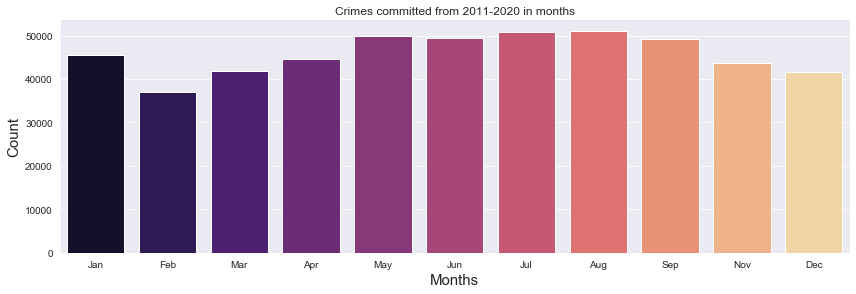

In [38]:
CumlMonths = CrimeReport[['Month','Total Incidents']].groupby("Month").count().reset_index()
CumlMonths.sort_values('Total Incidents',inplace=True)
sns.set_context(font_scale=1,rc={"font.size":10,"axes.labelsize":15})
sns.set_style("darkgrid")
sns.catplot(x="Month",y="Total Incidents", data=CumlMonths, kind='bar',height=4,aspect=3, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Nov','Dec'],palette='magma').set(title='Crimes committed from 2011-2020 in months',ylabel='Count',xlabel='Months')

# Crime activity throughout a nine year span within Baltimore City
- You can see from 2011-2013 that criminal activity become very consistent and stagnant for that three year mark.
- Now when you continue onward from the ending of 2013, you see that there has been a spike in 2014 then the highest recorded year in 2015 and then a slow decent in 2016. 
- Then is drastically fall back down and continued to decrease slowly. 

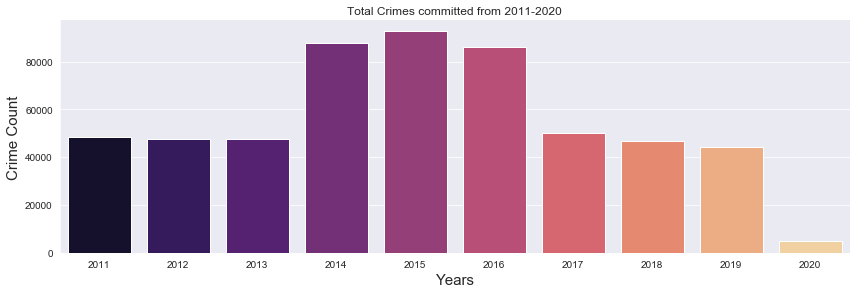

In [37]:
CumlYear = CrimeReport[['Year','Total Incidents']].groupby("Year").count().reset_index()
sns.set_context(font_scale=1,rc={"font.size":10,"axes.labelsize":15})
sns.set_style("darkgrid")
sns.catplot(x='Year',y='Total Incidents', data=CumlYear, kind='bar',height=4,aspect=3,palette='magma').set(title='Total Crimes committed from 2011-2020',ylabel='Crime Count',xlabel='Years')

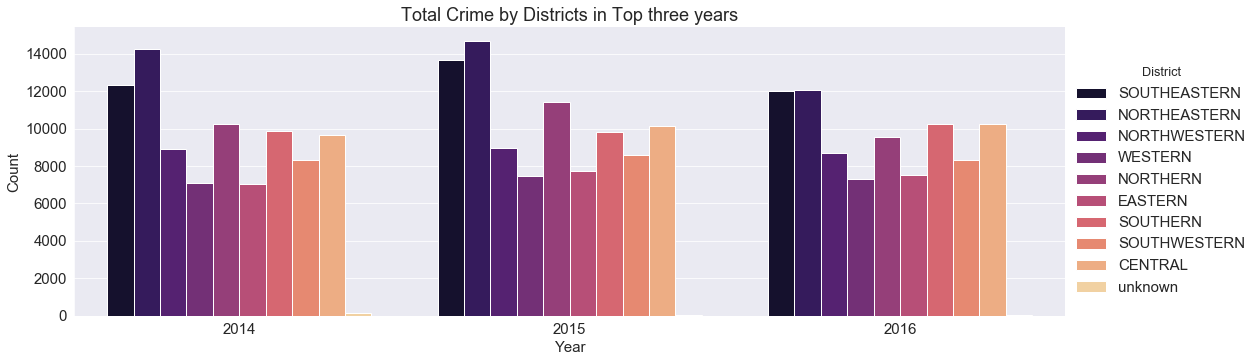

In [23]:
#fig, axs = plt.subplots(ncols=3,figsize=(18,10))
years=([2014,2015,2016])
Year2014_2016 = CrimeReport[CrimeReport.Year.isin(years)].sort_values('Year').reset_index(drop=True)
sns.set_context(font_scale=1,rc={"font.size":15,"axes.labelsize":15})
sns.catplot("Year", data=Year2014_2016, aspect=3, kind='count',hue='District',palette='magma').set_ylabels('Count').set(title='Total Crime by Districts in Top three years')

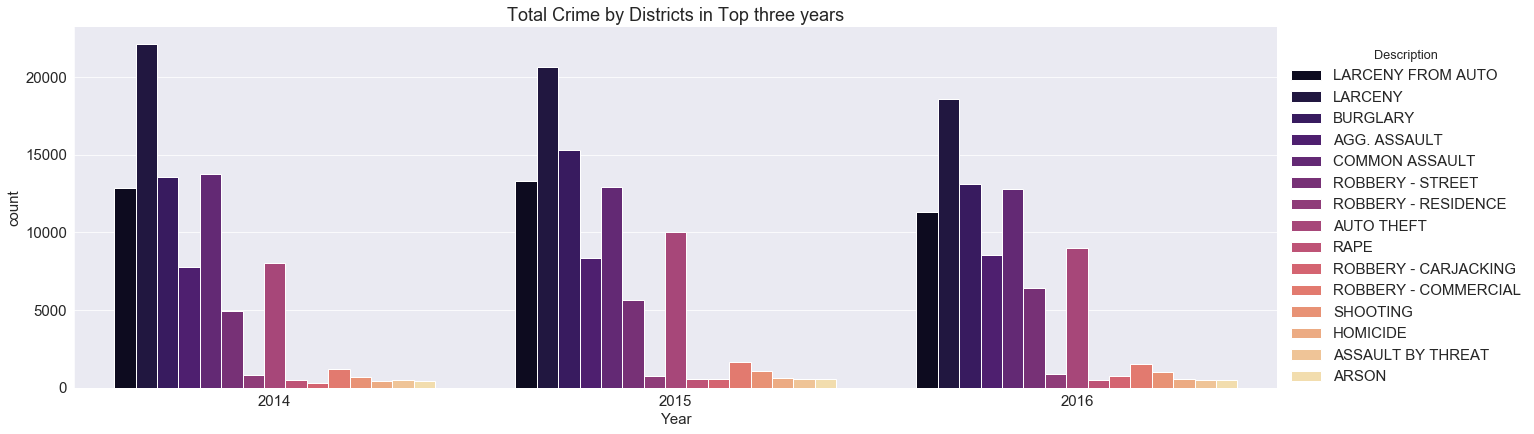

In [22]:
sns.set_context(font_scale=1,rc={"font.size":15,"axes.labelsize":15})
sns.catplot("Year",hue='Description',data=Year2014_2016,height=6,aspect=3,kind='count',palette='magma').set(title='Total Crime by Districts in Top three years')